In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
import numpy as np
import scipy


A = 1.0; B = 3.0; k1 = 2.0; km1 = 2.0; k3 = 3.0
# k2 = 1.8
# change k3

P = lambda x,y,k2: k1*A - (km1 + k2*B)*x + k3*x**2*y
Q = lambda x,y,k2: k2*B*x - k3*x**2*y

fun = lambda p,t,k2: [ P(*p, k2), Q(*p, k2) ]

fig, ax = plt.subplots()

line, = ax.plot([], '-')


ax.set_xlim(0,3)
ax.set_ylim(0,3)
ax.set_xlabel('X')
ax.set_ylabel('Y')

def animate(fn):
    tt = np.linspace(0,100, 1000)
    zz = odeint(fun, [1.0, 4.0], tt, args=(.8+1./100*fn,))
    line.set_data(zz[:,0], zz[:,1])
    return line

    
anim = FuncAnimation(fig, animate, frames=100, interval=50)

plt.show()

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


Text(0, 0.5, 'Y')

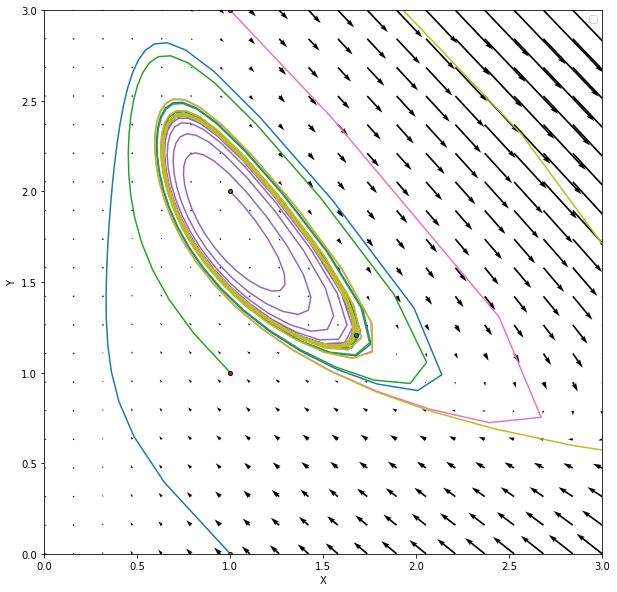

In [17]:
%matplotlib inline

A = 1.0; B = 3.0; k1 = 2.0; km1 = 2.0; k2 = 1.8; k3 = 3.0

P = lambda x,y: k1*A - (km1 + k2*B)*x + k3*x**2*y
Q = lambda x,y: k2*B*x - k3*x**2*y

fun = lambda p,t: [ P(p[0],p[1]), Q(p[0],p[1]) ]

plt.figure(figsize=(10,10))

x0_ = 1.0
tt = np.linspace(0,100, 1000)
for y0_ in [0,1,2,3,4]:
    xy0 = [x0_, y0_]
    zz = odeint(fun, xy0, tt)
    plt.plot(zz[:,0], zz[:,1])
    plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

pt = zz[-1,:]
plt.plot([pt[0]], [pt[1]], 'o', mec='k', ms=4)

# visualize the vector field
xx = np.linspace(0,3,20)
yy = np.linspace(0,3,20)
Xm,Ym = np.meshgrid(xx,yy)
plt.quiver(Xm,Ym, P(Xm,Ym), Q(Xm,Ym), scale_units='xy', angles='xy')
    
plt.legend()
plt.xlim(0,3)
plt.ylim(0,3)
plt.xlabel('X')
plt.ylabel('Y')

In [30]:
%matplotlib inline

pot = lambda p,k2: np.log(P(*p, k2)**2 + Q(*p, k2)**2) 
xx = np.linspace(0,10,1000)
yy = np.linspace(0,10,1000)

Xm, Ym = np.meshgrid(xx, yy)

plt.figure(figsize=(7,7))
plt.contourf(Xm, Ym, pot((Xm,Ym), k2))
plt.show

TypeError: <lambda>() takes 2 positional arguments but 3 were given

<Figure size 504x504 with 0 Axes>

In [26]:
from scipy.optimize import minimize